<a href="https://colab.research.google.com/github/loenneberger/project_vorlesung/blob/main/RL_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# 🚕 Reinforcement Learning – Q-Learning auf Taxi-v3
# Funktion: Ein RL-Agent lernt, in einer kleinen Stadt Passagiere abzuholen und ans Ziel zu bringen

import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [70]:
# 1️⃣ Umgebung initialisieren
env = gym.make("Taxi-v3", render_mode=None)

In [71]:
# 2️⃣ Q-Tabelle initialisieren (Zustände x Aktionen)
state_space_size = env.observation_space.n
action_space_size = env.action_space.n
q_table = np.zeros((state_space_size, action_space_size))

In [72]:
# 3️⃣ Hyperparameter
alpha = 0.7              # Lernrate
gamma = 0.95             # Diskontierungsfaktor
epsilon = 1.0            # Anfangs-Epsilon (Exploration)
epsilon_min = 0.05       # Minimales Epsilon
epsilon_decay = 0.995    # Abnahmefaktor für Epsilon
episodes = 2000          # Trainings-Episoden
max_steps = 100          # Maximale Schritte pro Episode

In [73]:
# 4️⃣ Für Visualisierung
reward_list = []

In [74]:
# 5️⃣ Training
print("🔁 Training startet...")
for episode in tqdm(range(episodes)):
    state, _ = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Aktionswahl: ε-greedy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Exploration
        else:
            action = np.argmax(q_table[state])  # Exploitation

        new_state, reward, done, truncated, _ = env.step(action)

        # Q-Wert aktualisieren
        old_value = q_table[state, action]
        next_max = np.max(q_table[new_state])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = new_state
        total_reward += reward

        if done or truncated:
            break

    # Epsilon reduzieren
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    reward_list.append(total_reward)

print("✅ Training abgeschlossen.")

🔁 Training startet...


100%|██████████| 2000/2000 [00:01<00:00, 1039.22it/s]

✅ Training abgeschlossen.


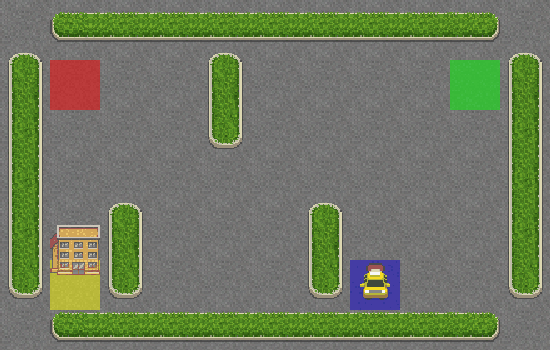

In [75]:
import imageio
from IPython.display import Image, display

# 1️⃣ Umgebung neu erstellen mit 'rgb_array' für grafisches Rendern
env = gym.make("Taxi-v3", render_mode="rgb_array")

# 2️⃣ Neue Episode starten
state, _ = env.reset()
frames = []

for step in range(50):
    action = np.argmax(q_table[state])
    new_state, reward, done, truncated, _ = env.step(action)

    # 3️⃣ Frame rendern und speichern
    frame = env.render()
    frames.append(frame)

    state = new_state
    if done or truncated:
        break

env.close()

# 4️⃣ GIF erstellen und anzeigen
gif_path = "/tmp/taxi_agent.gif"
imageio.mimsave(gif_path, frames, fps=2)

display(Image(filename=gif_path))


🔴 Frühe Episode (untrainiert):


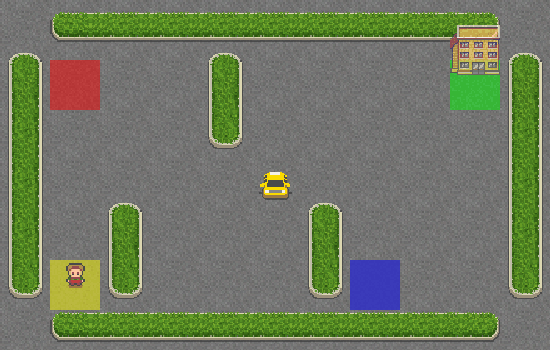

🟢 Späte Episode (trainiert):


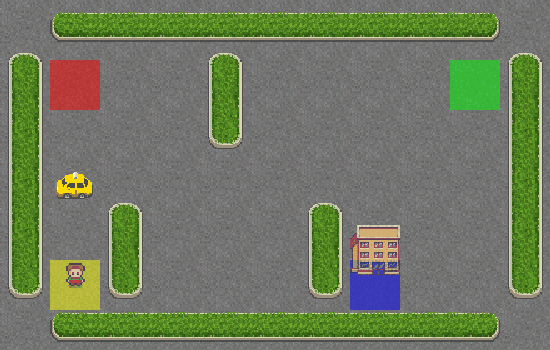

In [76]:
import imageio
from IPython.display import Image as IPImage
from IPython.display import display, HTML
from PIL import Image
import os

def run_episode_with_render(env, q_table, episode_name="episode", max_steps=50):
    state, _ = env.reset()
    frames = []

    for step in range(max_steps):
        action = np.argmax(q_table[state])
        new_state, reward, done, truncated, _ = env.step(action)
        frame = env.render()
        frames.append(frame)
        state = new_state
        if done or truncated:
            break

    # Speichern als GIF
    gif_path = f"/tmp/{episode_name}.gif"
    imageio.mimsave(gif_path, frames, fps=2)
    return gif_path

# 🔴 Schlechte Policy simulieren: Leere Q-Tabelle → Zufall
q_table_random = np.zeros_like(q_table)
env_random = gym.make("Taxi-v3", render_mode="rgb_array")
gif_early = run_episode_with_render(env_random, q_table_random, episode_name="early_random")

# 🟢 Trainierter Agent
env_trained = gym.make("Taxi-v3", render_mode="rgb_array")
gif_late = run_episode_with_render(env_trained, q_table, episode_name="late_trained")

# Zeige beide GIFs direkt nacheinander
print("🔴 Frühe Episode (untrainiert):")
display(IPImage(filename=gif_early))

print("🟢 Späte Episode (trainiert):")
display(IPImage(filename=gif_late))


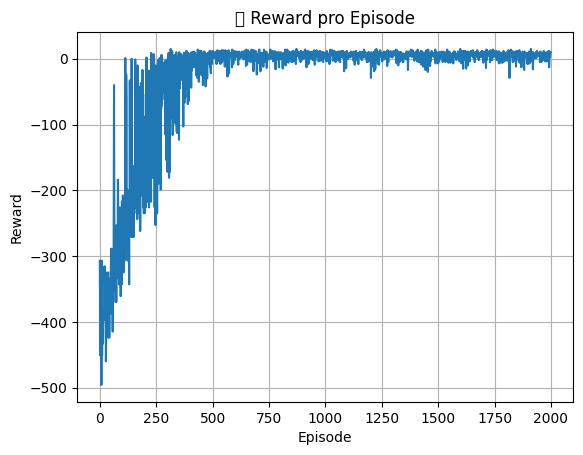

In [77]:
# 6️⃣ Lernkurve plotten
plt.plot(reward_list)
plt.title("📈 Reward pro Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

🏁 Totaler Reward: 3


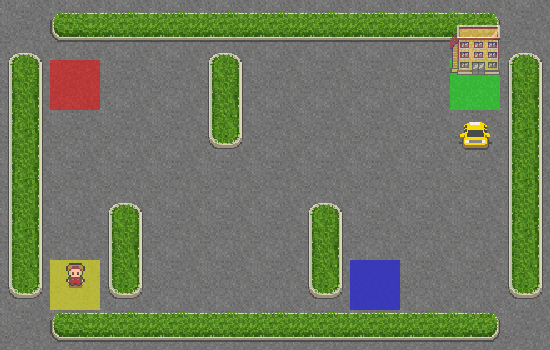

In [78]:
import imageio
from IPython.display import Image as IPImage

# 🚖 Trainierte Episode visuell darstellen
def run_trained_episode_as_gif(q_table, steps=50, gif_name="trained_agent_run"):
    env_viz = gym.make("Taxi-v3", render_mode="rgb_array")
    state, _ = env_viz.reset()
    frames = []

    total_reward = 0
    for _ in range(steps):
        action = np.argmax(q_table[state])
        new_state, reward, done, truncated, _ = env_viz.step(action)
        frame = env_viz.render()
        frames.append(frame)
        total_reward += reward
        state = new_state
        if done or truncated:
            break

    gif_path = f"/tmp/{gif_name}.gif"
    imageio.mimsave(gif_path, frames, fps=2)
    return gif_path, total_reward

# 🔁 Ausführen und anzeigen
gif_path, final_reward = run_trained_episode_as_gif(q_table)
print(f"🏁 Totaler Reward: {final_reward}")
display(IPImage(filename=gif_path))
